In [1]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import emcee
from scipy import stats
import corner
from astropy import units as u
from astropy.coordinates import SkyCoord

import ModelDefinitions as MD
import LogProb as LP
from const import *
from TRIS_vals import *
from multifreq_data import *

import importlib
importlib.reload(LP)
importlib.reload(MD)

NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Sigma is 584.819674 arcmin (0.170117 rad) 
-> fwhm is 1377.145090 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Sigma is 584.529302 arcmin (0.170033 rad) 
-> fwhm is 1376.461318 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Sigma is 570.972611 arcmin (0.166089 rad) 
-> fwhm is 1344.537750 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/Users/vikram/.pyenv/versions/3.7.4/lib/python3.7/site-packages/healpy/fitsfunc.py:371: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


<module 'ModelDefinitions' from '/Users/vikram/Projects/radioBackground/radio-background/ModelDefinitions.py'>

In [2]:
modelprobs = np.array([LP.multifreq])
outfiles = np.array(['multifreq.npz'])
#R_disk, h_disk, j_disk, a_disk, R_halo, j_halo, a_halo, T_1420, T_820, T_600, T_408, T_150
param_inits = np.array([2., 0.7, (-40.39), 0.7, 3., (-41.61), 0.9, 0.3, 1, 3, 10., 30.])
priors_lower = np.array([1., 0., (-45), 0.5, 1., (-45),0.5, 0., 0., 0., 0., 0.])
priors_upper = np.array([10., 3., (-40), 1.5, 10., (-40), 1.5, 50., 50., 50., 50., 50.])

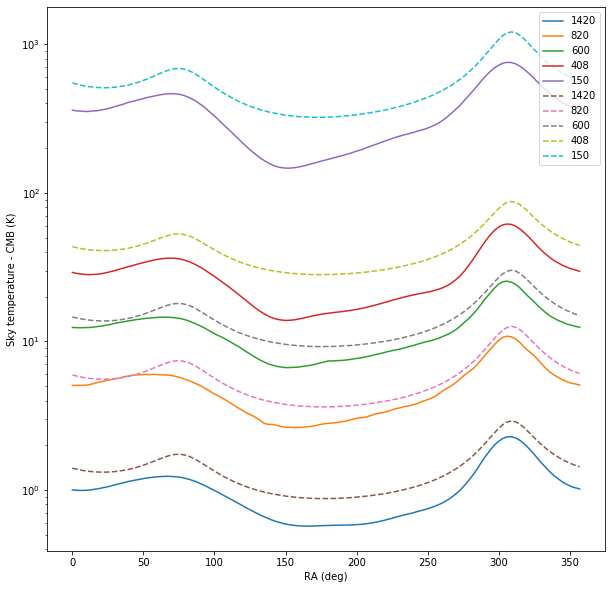

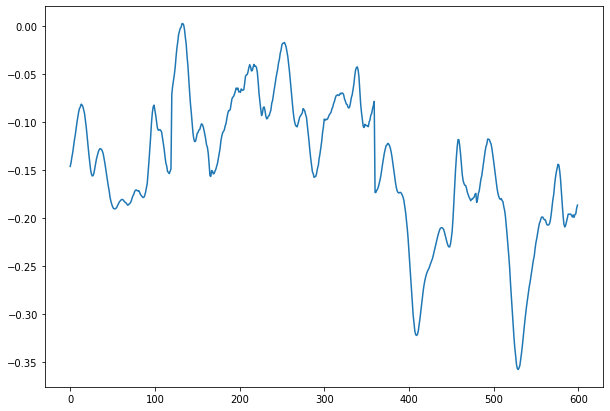

15.60574057046828


In [3]:
# visualise initial params

d0 = LP.return_stuff(param_inits)
coords = SkyCoord(l*u.degree,b*u.degree,frame='galactic')
ras = coords.icrs.ra.deg

plt.figure(figsize=(10,10))
plt.semilogy(ras,d0[0][0],label='1420')
plt.semilogy(ras,d0[1][0],label='820')
plt.semilogy(ras,d0[2][0],label='600')
plt.semilogy(ras,d0[3][0],label='408')
plt.semilogy(ras,d0[4][0],label='150')
plt.xlabel('RA (deg)')
plt.ylabel('Sky temperature - CMB (K)')
#plt.legend()

#plt.figure(figsize=(10,10))
plt.semilogy(ras,d0[0][1],'--',label='1420')
plt.semilogy(ras,d0[1][1],'--',label='820')
plt.semilogy(ras,d0[2][1],'--',label='600')
plt.semilogy(ras,d0[3][1],'--',label='408')
plt.semilogy(ras,d0[4][1],'--',label='150')
#plt.xlabel('RA (deg)')
#plt.ylabel('Sky temperature - CMB (K)')
plt.legend()

plt.figure(figsize=(10,7))
plt.plot(LP.resid(param_inits))
plt.show()

print(np.sum(LP.resid(param_inits)**2.))



In [4]:
# minimization of parameters
from scipy.optimize import least_squares
bounds = (priors_lower,priors_upper)
res_1 = least_squares(LP.resid,param_inits,loss='linear',verbose=2,bounds=bounds,xtol=None)
print(res_1.x)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         7.8029e+00                                    2.41e+02    
       1              2         2.0812e+00      5.72e+00       2.01e-01       2.28e+01    
       2              4         1.2011e+00      8.80e-01       6.63e-01       2.67e+01    
       3              5         7.4752e-01      4.54e-01       1.14e+00       2.38e+01    


/Users/vikram/Projects/radioBackground/radio-background/ModelDefinitions.py:54: RuntimeWarning: invalid value encountered in arcsin
  B_halo_below = (np.pi - b - np.arcsin((d_proj/R_eff_below)*np.sin(b)))


       4              6         4.9777e-01      2.50e-01       2.05e+00       6.60e+00    
       5              7         4.2491e-01      7.29e-02       6.71e+00       8.54e-01    
       6              8         3.4910e-01      7.58e-02       1.25e+01       2.66e+00    
       7              9         3.3093e-01      1.82e-02       1.08e+01       2.30e+00    
       8             12         3.2701e-01      3.91e-03       9.03e-02       5.28e-01    
       9             13         3.2650e-01      5.09e-04       4.38e-01       2.31e+00    
      10             14         3.2379e-01      2.71e-03       4.01e-01       2.66e-01    
      11             16         3.2370e-01      9.12e-05       4.45e-02       5.80e-03    
      12             18         3.2370e-01      1.56e-06       6.33e-03       1.49e-03    
      13             19         3.2370e-01      1.01e-06       3.10e-03       1.85e-04    
      14             22         3.2370e-01      1.19e-07       3.69e-04       8.26e-06    

/Users/vikram/.pyenv/versions/3.7.4/lib/python3.7/site-packages/scipy/optimize/_lsq/common.py:117: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/Users/vikram/.pyenv/versions/3.7.4/lib/python3.7/site-packages/scipy/optimize/_lsq/common.py:156: RuntimeWarning: invalid value encountered in double_scalars
  ratio = phi / phi_prime
/Users/vikram/.pyenv/versions/3.7.4/lib/python3.7/site-packages/scipy/optimize/_lsq/common.py:371: RuntimeWarning: invalid value encountered in greater_equal
  return np.all((x >= lb) & (x <= ub))
/Users/vikram/.pyenv/versions/3.7.4/lib/python3.7/site-packages/scipy/optimize/_lsq/common.py:371: RuntimeWarning: invalid value encountered in less_equal
  return np.all((x >= lb) & (x <= ub))


      21             295        3.2370e-01      0.00e+00       0.00e+00       2.48e+02    
`ftol` termination condition is satisfied.
Function evaluations 295, initial cost 7.8029e+00, final cost 3.2370e-01, first-order optimality 2.48e+02.
[ 2.00723997e+00  7.00000000e-01 -4.04422009e+01  6.46785344e-01
  1.15450358e+00 -4.14721126e+01  9.94721444e-01  1.65063978e-01
  1.16442504e+00  3.36735417e+00  3.94308043e+00  2.37972495e-02]


/Users/vikram/.pyenv/versions/3.7.4/lib/python3.7/site-packages/scipy/optimize/_lsq/trf.py:370: RuntimeWarning: divide by zero encountered in double_scalars
  alpha *= Delta / Delta_new
/Users/vikram/.pyenv/versions/3.7.4/lib/python3.7/site-packages/scipy/optimize/_lsq/common.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  alpha_upper = norm(suf) / Delta


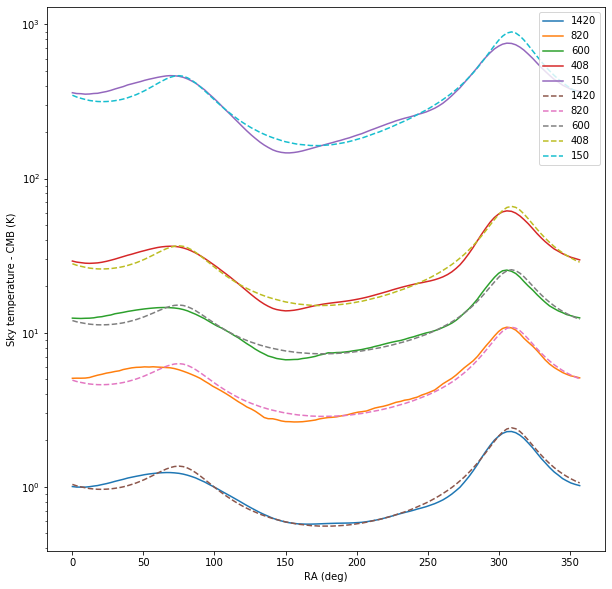

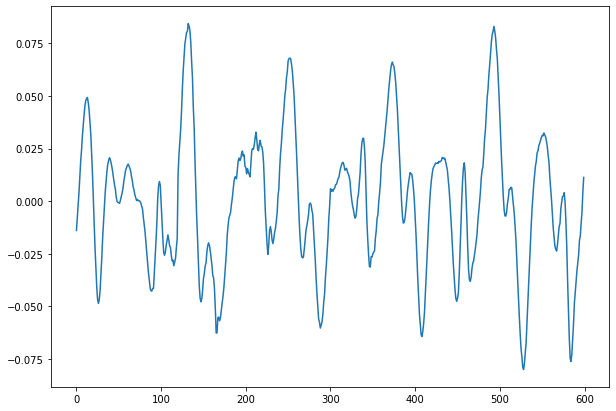

In [5]:
d0 = LP.return_stuff(res_1.x)
coords = SkyCoord(l*u.degree,b*u.degree,frame='galactic')
ras = coords.icrs.ra.deg

plt.figure(figsize=(10,10))
plt.semilogy(ras,d0[0][0],label='1420')
plt.semilogy(ras,d0[1][0],label='820')
plt.semilogy(ras,d0[2][0],label='600')
plt.semilogy(ras,d0[3][0],label='408')
plt.semilogy(ras,d0[4][0],label='150')
plt.xlabel('RA (deg)')
plt.ylabel('Sky temperature - CMB (K)')
#plt.legend()

#plt.figure(figsize=(10,10))
plt.semilogy(ras,d0[0][1],'--',label='1420')
plt.semilogy(ras,d0[1][1],'--',label='820')
plt.semilogy(ras,d0[2][1],'--',label='600')
plt.semilogy(ras,d0[3][1],'--',label='408')
plt.semilogy(ras,d0[4][1],'--',label='150')
#plt.xlabel('RA (deg)')
#plt.ylabel('Sky temperature - CMB (K)')
plt.legend()

plt.figure(figsize=(10,7))
plt.plot(res_1.fun)
plt.show()
